# Python for Finance
### How compute portfolio simple returns, daily returns and volitility

### Video Link
[Python For Finance](https://youtu.be/O-O1WclwXck?si=YmSguoHPY_u-kHx4)

[STOCK PORTFOLIO DATAFRAME]


,AAPL,AMZN,GOOG,META,NFLX,SPLG
Date,,,,,,
2013-01-02,16.77,12.87,18.01,28.00,13.14,13.97
2013-01-03,16.56,12.92,18.02,27.77,13.80,13.98
2013-01-04,16.10,12.96,18.38,28.76,13.71,14.01
2013-01-07,16.00,13.42,18.30,29.42,14.17,14.01
2013-01-08,16.04,13.32,18.26,29.06,13.88,13.95
...,...,...,...,...,...,...
2023-12-19,196.94,153.79,138.10,350.36,495.02,55.86
2023-12-20,194.83,152.12,139.66,349.28,489.27,55.02
2023-12-21,194.68,153.84,141.80,354.09,491.61,55.61


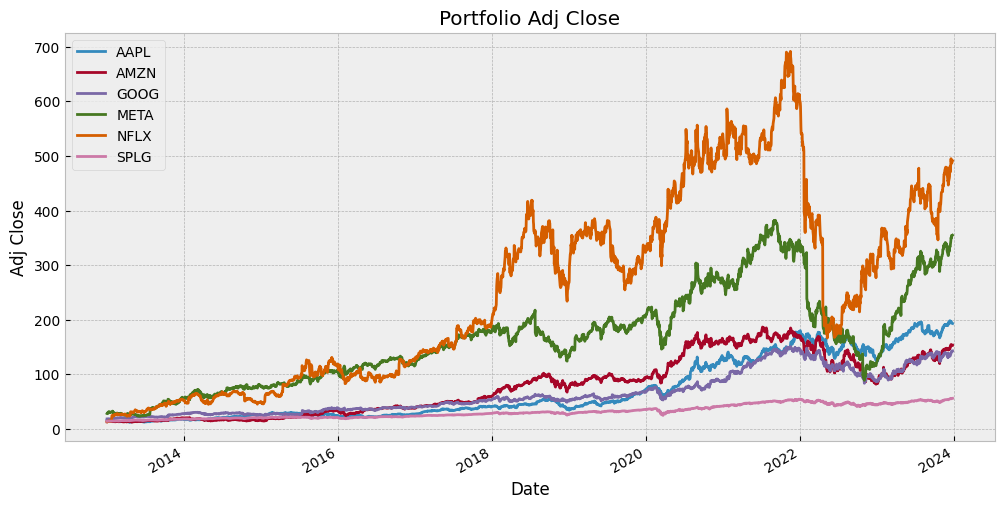

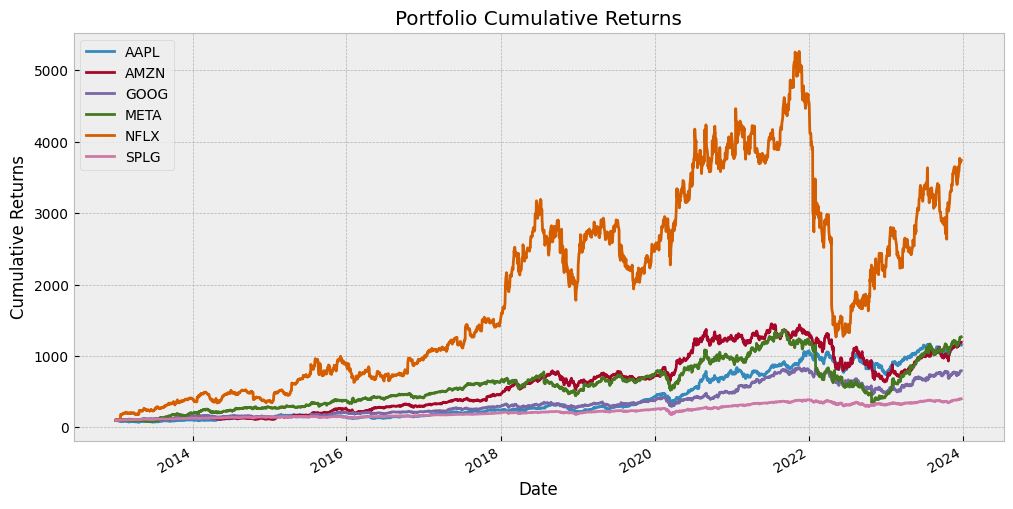

[DAILY RETURNS DATAFRAME]


,AAPL,AMZN,GOOG,META,NFLX,SPLG
Date,,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-03,-1.252236,0.388500,0.055525,-0.821429,5.022831,0.071582
2013-01-04,-2.777778,0.309598,1.997780,3.564998,-0.652174,0.214592
2013-01-07,-0.621118,3.549383,-0.435256,2.294854,3.355215,0.000000
2013-01-08,0.250000,-0.745156,-0.218579,-1.223657,-2.046577,-0.428266
...,...,...,...,...,...,...
2023-12-19,0.536015,-0.181736,0.663314,1.665603,1.830824,0.594273
2023-12-20,-1.071392,-1.085896,1.129616,-0.308254,-1.161569,-1.503759
2023-12-21,-0.076990,1.130686,1.532293,1.377119,0.478264,1.072337


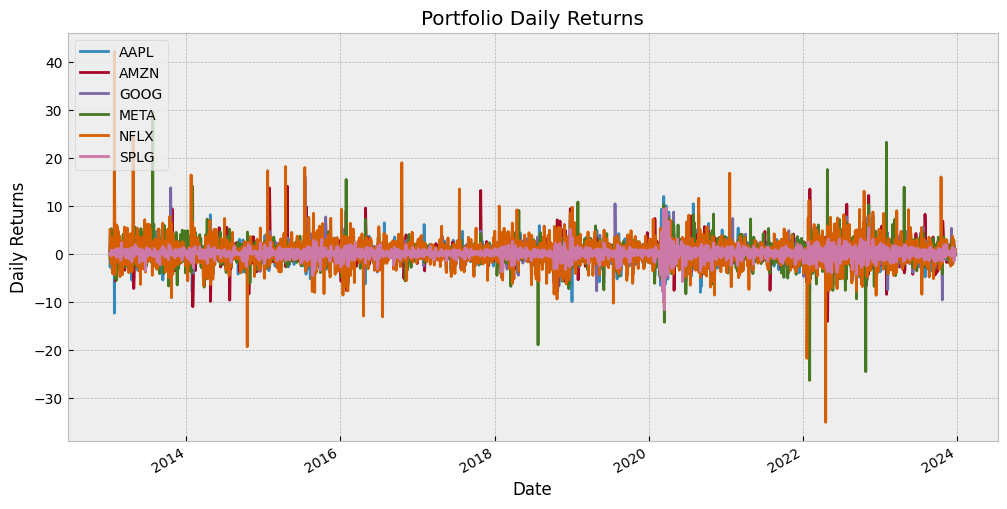

[Daily Returns Correlation]


,AAPL,AMZN,GOOG,META,NFLX,SPLG
AAPL,1.00,0.50,0.56,0.48,0.32,0.68
AMZN,0.50,1.00,0.63,0.55,0.47,0.58
GOOG,0.56,0.63,1.00,0.60,0.42,0.69
META,0.48,0.55,0.60,1.00,0.40,0.55
NFLX,0.32,0.47,0.42,0.40,1.00,0.42
SPLG,0.68,0.58,0.69,0.55,0.42,1.00


[Daily Returns Covariance]


,AAPL,AMZN,GOOG,META,NFLX,SPLG
AAPL,3.20,1.84,1.75,2.08,1.70,1.32
AMZN,1.84,4.23,2.24,2.72,2.86,1.30
GOOG,1.75,2.24,2.99,2.49,2.17,1.29
META,2.08,2.72,2.49,5.83,2.89,1.43
NFLX,1.70,2.86,2.17,2.89,8.75,1.35
SPLG,1.32,1.30,1.29,1.43,1.35,1.17


[The Portfolio's Volitility]


,Volatility(STD)
NFLX,2.96
META,2.41
AMZN,2.06
AAPL,1.79
GOOG,1.73
SPLG,1.08


The higher the volatility, the riskier the security.
The lower the volatility, the safer the security


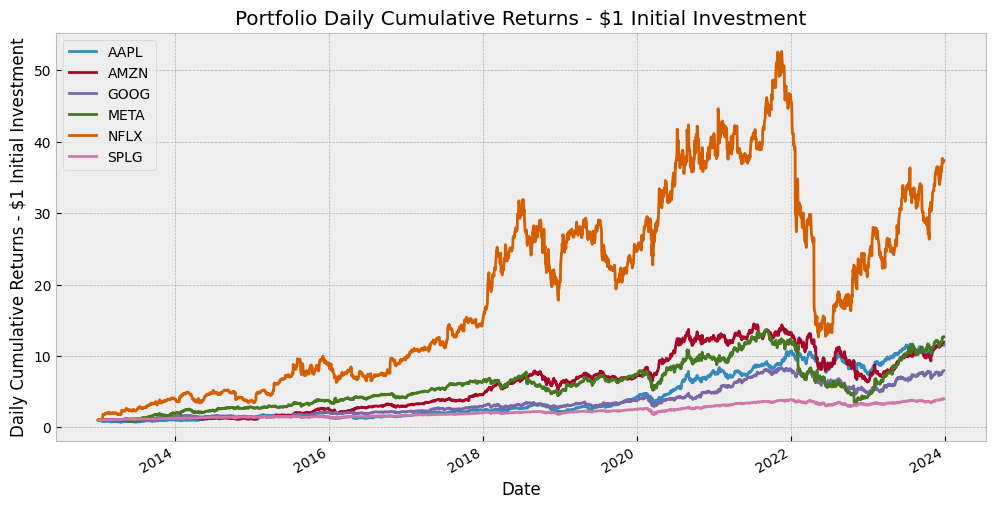

[STARTING WITH 1$ INVESTMENT]
                AAPL      AMZN      GOOG      META      NFLX      SPLG
Date                                                                  
2013-01-04  0.960048  1.006993  1.020544  1.027143  1.043379  1.002863 

                 AAPL       AMZN      GOOG     META       NFLX      SPLG
Date                                                                    
2023-12-26  11.511628  11.919969  7.930039  12.6725  37.381279  4.003579


In [24]:
from datetime import datetime
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('bmh') # other styles are 'ggplot', 'fivethirtyeight', 'bmh', 'seaborn', 'seaborn-darkgrid'

def get_stock_data(stock_symbols, start_date, end_date, col):
    # get stock data from yahoo finance
    stock_data = yf.download(stock_symbols, start_date, end_date, progress=False, rounding=True)[col]
    return stock_data

def show_portfolio(stock_portfolio, col= 'Adj Close'):
    # show portfolio
    stock_portfolio.plot(figsize=(12,6))
    plt.legend(loc='upper left')
    plt.title(f'Portfolio {col}')
    plt.ylabel(f'{col}')
    plt.show()

def cumulative_returns(stock_portfolio):
    # show cumulative returns
    cum_returns = (stock_portfolio / stock_portfolio.iloc[0] * 100)
    return cum_returns

def compute_daily_returns(stock_portfolio, times_by_100= True):
    '''Calculation
    df[t] / df[t-1] - 1
    where t is the current time(today) and t-1 is the previous time(yesterday
    for simplicity we will use pct_change() method
    '''
    # calculate daily returns
    if times_by_100:
        daily_ret = stock_portfolio.pct_change(1) * 100
    else:
        daily_ret = stock_portfolio.pct_change(1)
    return daily_ret

def run_app():
    benchmark = 'SPLG'
    # create a protfolio - use FAANG stocks
    stock_symbols = [benchmark, 'META', 'AMZN', 'AAPL', 'NFLX', 'GOOG'] 
    start_date = '2013-01-01'
    end_date = datetime.today().strftime('%Y-%m-%d')
    stock_portfolio = get_stock_data(stock_symbols, start_date, end_date, 'Adj Close')
    print('[STOCK PORTFOLIO DATAFRAME]')
    display(stock_portfolio)
    show_portfolio(stock_portfolio)
    cum_returns = cumulative_returns(stock_portfolio)
    show_portfolio(cum_returns, 'Cumulative Returns')
    daily_returns = compute_daily_returns(stock_portfolio)
    print('[DAILY RETURNS DATAFRAME]')
    display(daily_returns)
    show_portfolio(daily_returns, 'Daily Returns')
    # show the correlation between stocks
    print('[Daily Returns Correlation]')
    display(daily_returns.corr(method='pearson').style.background_gradient(cmap='coolwarm').format(precision=2))
    # show the covariance between stocks
    print('[Daily Returns Covariance]')
    display(daily_returns.cov().style.background_gradient(cmap='coolwarm').format(precision=2))
    # https://www.investopedia.com/terms/c/covariance.asp
    # https://www.investopedia.com/terms/c/correlation.asp
    # https://www.investopedia.com/terms/c/correlationcoefficient.asp
    print("[The Portfolio's Volitility]")
    display(daily_returns.std().sort_values(ascending=False).to_frame('Volatility(STD)').style.background_gradient(cmap='coolwarm').format(precision=2))
    print('The higher the volatility, the riskier the security.\nThe lower the volatility, the safer the security')
    # https://www.investopedia.com/terms/v/volatility.asp
    # use 1$ as the initial investment
    initial_investment = 1
    dailyCumulativeSimpleReturns = (compute_daily_returns(stock_portfolio, times_by_100=False) + initial_investment).cumprod()
    show_portfolio(dailyCumulativeSimpleReturns, 'Daily Cumulative Returns - $1 Initial Investment')
    print('[STARTING WITH 1$ INVESTMENT]')
    print(dailyCumulativeSimpleReturns.iloc[[2]], '\n')
    print(dailyCumulativeSimpleReturns.iloc[[-1]])

if __name__ == "__main__":
    run_app()